In [1]:
from flair.embeddings import WordEmbeddings
from flair.data import Sentence

c:\program files\python\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
sentence = Sentence('Peter is father of Tom grandfather grandmother mother sister brother son daughter wife husband grandchild \
                    grandson granddaughter nephew niece uncle aunt parent child grandparent friend')


In [3]:
glove_embedding = WordEmbeddings('glove')

In [4]:
glove_embedding.embed(sentence)

[Sentence: "Peter is father of Tom grandfather grandmother mother sister brother son daughter wife husband grandchild grandson granddaughter nephew niece uncle aunt parent child grandparent friend" - 25 Tokens]

In [5]:
embedding_dict = {}

for token in sentence:
    embedding_dict[token.text] = token.embedding

embedding_dict

{'Peter': tensor([-0.1243,  0.2709, -0.2573, -0.9258,  0.2835, -0.2194, -0.2565, -0.3976,
         -0.5738, -0.6895, -0.0134,  0.1228,  0.0262,  0.6144,  0.2736, -0.7671,
          0.2440,  0.1187, -0.9562,  0.5759, -0.2643,  0.2744,  0.5089,  0.0754,
          0.4246, -0.0720,  0.3544, -0.2018,  0.3806,  0.5809, -0.4726,  0.1616,
         -0.0174, -0.2855, -0.4904, -0.5123, -0.0452,  0.4785,  0.3025, -0.2769,
         -0.2767,  0.0951,  0.2934,  0.2597, -0.1471, -0.2324, -0.9143, -0.8766,
          0.0483,  0.3275,  1.0647, -0.6101,  0.1543,  0.3815, -0.1675, -3.0263,
         -1.0712,  0.4460,  0.0522, -0.5045,  0.3866,  0.2073, -0.1338,  0.1269,
          0.1835, -0.5645, -0.1121,  1.4906,  0.6329,  0.5140,  0.0118, -0.2355,
         -0.2948, -0.6335,  0.0652, -0.9204, -0.3436, -0.1391,  0.0763,  0.7959,
          0.2754, -0.1879,  0.1132, -0.1384, -0.7662, -0.7202, -0.6924, -0.8399,
         -0.1529, -0.1429,  0.2693, -0.7905,  0.5237,  0.4605,  0.1611, -0.2589,
          0.0605, -

In [6]:
rel_vector = sum([embedding_dict['father'], embedding_dict['of']])

## Using PCA

In [7]:
from sklearn.decomposition import PCA
import numpy as np

X = np.vstack((embedding_dict['brother'], embedding_dict['father'], rel_vector, embedding_dict['mother'], 
               embedding_dict['sister'], embedding_dict['son'], embedding_dict['daughter'], 
               embedding_dict['husband'], embedding_dict['wife'], embedding_dict['grandson'], embedding_dict['granddaughter'], 
              embedding_dict['grandmother'], embedding_dict['grandfather'], embedding_dict['friend'], embedding_dict['uncle'], 
               embedding_dict['aunt']))

pca = PCA(n_components=2)
result = pca.fit_transform(X)
result[:-2, 0]

array([ 5.0159645e-01,  1.0939946e+00,  6.8456492e+00, -7.2432652e-02,
       -7.5644511e-01,  7.7297461e-01, -1.9565339e-01,  3.5260003e-02,
       -3.3145626e-03, -7.2191745e-01, -2.1897614e+00, -1.5729675e+00,
       -6.3767046e-01, -1.9064803e-01], dtype=float32)

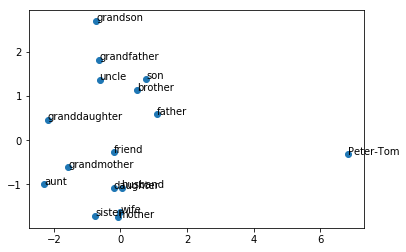

In [12]:
import matplotlib.pyplot as plt

plt.scatter(result[:, 0], result[:, 1])
plt.plot(result[0:1, 0], result[0:1, 1])
x=result[1:-10, 0]
y=result[1:-10, 1]

#for i in range(0, len(x), 2):
#    plt.plot(x[i:i+2], y[i:i+2], 'bo-')

words = ['brother', 'father', 'Peter-Tom', 'mother', 'sister', 'son', 'daughter', 'husband', 
         'wife', 'grandson', 'granddaughter', 'grandmother', 'grandfather', 'friend', 'uncle', 'aunt']

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

#plt.savefig('wordembeddings_flair.png', format='png')
plt.show()

## Using TSNE

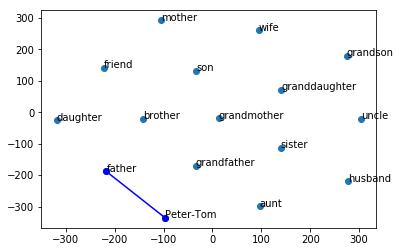

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
result = tsne.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
plt.plot(result[0:1, 0], result[0:1, 1])
x=result[1:-10, 0]
y=result[1:-10, 1]

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    
# draw connection between two vectors
#for i in range(0, len(x), 2):
#    plt.plot(x[i:i+2], y[i:i+2], 'bo-')
i = 0
plt.plot(x[i:i+2], y[i:i+2], 'bo-')   
plt.savefig('embeddings_flair_tsne.png', dpi=199, format='png')

plt.show() 